<a href="https://colab.research.google.com/github/Eaglethatlives/Individual-Assignment-Machine-Learning-Tutorial/blob/main/Enhanced_Tutorial_Logistic_Regression_vs_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression vs Random Forests: A Comprehensive Tutorial
## Predicting Football Match Outcomes with Machine Learning

---

###  Learning Objectives

By the end of this tutorial, We should be able to:

1. **Understand** the fundamental differences between Logistic Regression and Random Forests
2. **Implement** both algorithms using scikit-learn
3. **Preprocess** real-world data to prevent common pitfalls like data leakage
4. **Evaluate** models using multiple metrics (accuracy, precision, recall, ROC-AUC)
5. **Interpret** feature importance and model coefficients
6. **Decide** which algorithm to use based on your specific requirements

---

### Dataset Overview

We'll use **4,070 Premier League matches** with 114 features including:
- Match statistics (shots, possession, tackles, etc.)
- Historical performance averages
- Home/away specific metrics

**Binary Classification Task:** Predict whether the home team wins (1) or doesn't win (0)

---

###  Table of Contents

1. [Setup and Imports](#1-setup)
2. [Understanding the Algorithms](#2-theory)
3. [Data Loading and Exploration](#3-data)
4. [Data Preprocessing](#4-preprocessing)
5. [Model Training](#5-training)
6. [Model Evaluation](#6-evaluation)
7. [Feature Importance Analysis](#7-features)
8. [Results Comparison](#8-results)
9. [Best Practices and Takeaways](#9-best-practices)

---
## 1. Setup and Imports <a id="1-setup"></a>

Let's start by importing all necessary libraries. We'll use:
- **pandas** & **numpy** for data manipulation
- **scikit-learn** for machine learning models and metrics
- **matplotlib** & **seaborn** for visualizations

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score
)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


---
## 2. Understanding the Algorithms <a id="2-theory"></a>

### 🔵 Logistic Regression: The Linear Classifier

**How it works:**
- Models probability using the sigmoid function: $P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_nx_n)}}$
- Creates a **linear decision boundary** to separate classes
- Coefficients (β) show both **importance** and **direction** of each feature's effect

**Key Characteristics:**
- 1. **Highly interpretable** - clear coefficient values
- 2. **Fast training** - efficient even with large datasets

     3.**Probabilistic outputs** - gives confidence scores
- 4. **Requires feature scaling** - sensitive to feature magnitudes
- 5. **Linear only** - cannot capture complex non-linear patterns

**Best for:**
- When interpretability is critical (healthcare, finance, legal)
- Linear relationships between features and outcome
- When you need probability estimates
- Limited computational resources

---

### Random Forests: The Ensemble Powerhouse

**How it works:**
1. Creates multiple decision trees using random subsets of data (bootstrap sampling)
2. Each tree considers only random subsets of features at each split
3. Final prediction = majority vote across all trees

**Key Characteristics:**
- **Captures non-linear patterns** - handles complex relationships
- **Robust to outliers** - averaging reduces impact of noise
- **No scaling needed** - scale-invariant
-  **Feature importance** - identifies key predictors
- **Less interpretable** - harder to explain individual predictions
-  **Slower training** - builds many trees

**Best for:**
- Complex, non-linear data patterns
- Many features with interactions
- When accuracy > interpretability
- Noisy data with outliers

---

### Quick Comparison

| Aspect | Logistic Regression | Random Forests |
|--------|-------------------|---------------|
| **Interpretability** | Excellent | Good |
| **Non-linear Patterns** | Limited | Excellent |
| **Training Speed** | Fast | Moderate |
| **Requires Scaling** | Yes | No |
| **Overfitting Risk** | Low (with regularization) | Low (due to averaging) |

---
## 3. Data Loading and Exploration <a id="3-data"></a>

Let's load our Premier League dataset and understand its structure.

In [43]:
# Load the dataset
df = pd.read_csv('/content/df_full_premierleague 2.csv')

print(f"Dataset Shape: {df.shape[0]:,} matches × {df.shape[1]} features")
print(f"Seasons covered: {df['season'].unique()[:5]}... ({len(df['season'].unique())} total seasons)")
print(f"Teams in dataset: {df['home_team'].nunique()}")

# Display first few rows
print("\n Sample Data:")
df.head()

Dataset Shape: 4,070 matches × 114 features
Seasons covered: ['10/11' '11/12' '12/13' '13/14' '14/15']... (11 total seasons)
Teams in dataset: 37

 Sample Data:


,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7


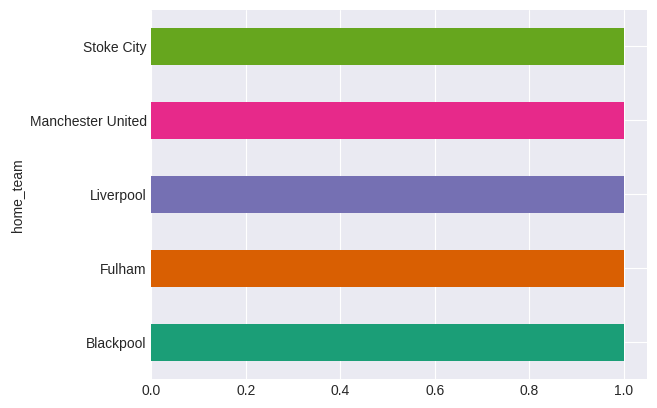

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('home_team').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
# Check for missing values
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing %': missing_pct.values
}).query('`Missing %` > 0').sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    print(f" Missing values detected in {len(missing_df)} columns:")
    print(missing_df.head(10))
else:
    print("✓ No missing values detected!")

✓ No missing values detected!


🎯 Match Results Distribution:
   Home Wins (H): 1,835 (45.1%)
   Draws (D):     1,000 (24.6%)
   Away Wins (A): 1,235 (30.3%)


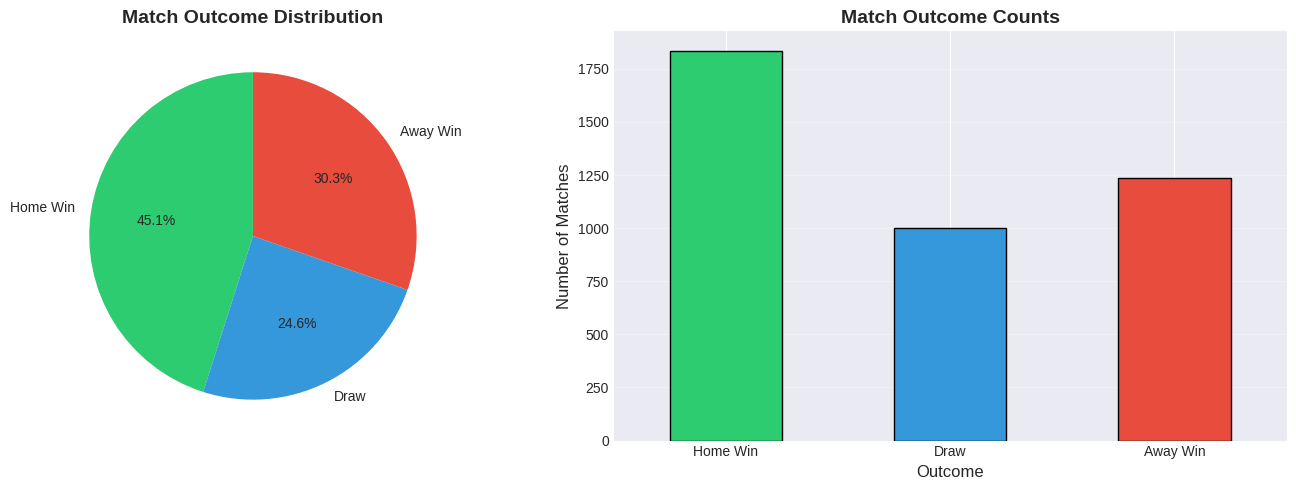


📌 Note: We'll convert this to binary classification (Home Win vs. Not Home Win)


In [44]:
# Analyze target distribution
def get_match_outcome(score_str):
    if '-' not in score_str:
        return 'UNKNOWN' # Handle potential malformed strings
    home_score, away_score = map(int, score_str.split('-'))
    if home_score > away_score:
        return 'H' # Home Win
    elif home_score < away_score:
        return 'A' # Away Win
    else:
        return 'D' # Draw

# Apply the function to create a new series with 'H', 'D', 'A' outcomes
match_outcomes = df['result_full'].apply(get_match_outcome)

result_counts = match_outcomes.value_counts()
result_pct = (result_counts / len(df) * 100).round(1)

print("🎯 Match Results Distribution:")
print(f"   Home Wins (H): {result_counts.get('H', 0):,} ({result_pct.get('H', 0.0)}%)")
print(f"   Draws (D):     {result_counts.get('D', 0):,} ({result_pct.get('D', 0.0)}%)")
print(f"   Away Wins (A): {result_counts.get('A', 0):,} ({result_pct.get('A', 0.0)}%)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
# Ensure labels and order match 'H', 'D', 'A' for consistency
labels = ['Home Win', 'Draw', 'Away Win']
sizes = [result_counts.get('H', 0), result_counts.get('D', 0), result_counts.get('A', 0)]
colors = ['#2ecc71', '#3498db', '#e74c3c']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax1.set_title('Match Outcome Distribution', fontsize=14, fontweight='bold')

# Bar chart
# Create a series explicitly with 'H', 'D', 'A' index for consistent plotting
plot_series = pd.Series(sizes, index=['H', 'D', 'A'])
plot_series.plot(kind='bar', ax=ax2, color=colors, edgecolor='black')
ax2.set_title('Match Outcome Counts', fontsize=14, fontweight='bold')
ax2.set_xlabel('Outcome', fontsize=12)
ax2.set_ylabel('Number of Matches', fontsize=12)
ax2.set_xticklabels(['Home Win', 'Draw', 'Away Win'], rotation=0)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📌 Note: We'll convert this to binary classification (Home Win vs. Not Home Win)")

---
## 4. Data Preprocessing <a id="4-preprocessing"></a>

### 🚨 Critical Step: Preventing Data Leakage

**Data leakage** occurs when information from the future or the target variable "leaks" into your features. This creates unrealistically high accuracy that won't generalize to new data.

**Example of leakage:**
- Using `goal_home_ft` (final goals scored) to predict who wins
- Using `result_ht` (halftime result) which is highly correlated with final result

We must remove ALL outcome-related columns before training.

In [12]:
# Handle missing values
print("1: Removing rows with missing values...")
df = df.dropna()
print(f"✓ Dataset shape after cleaning: {df.shape}\n")

# Encode categorical variables (team names)
print("2: Encoding team names...")
le_home = LabelEncoder()
le_away = LabelEncoder()
df['home_team_encoded'] = le_home.fit_transform(df['home_team'])
df['away_team_encoded'] = le_away.fit_transform(df['away_team'])
print(f"✓ Encoded {df['home_team'].nunique()} teams\n")

# Create binary target variable
print("3: Creating target variable...")
# Apply the function to convert full score strings ('X-Y') to 'H', 'D', 'A' outcomes
# Then, create the binary target (Home Win vs. Not Home Win)
y = (df['result_full'].apply(get_match_outcome) == 'H').astype(int)
print(f"✓ Target distribution: {y.sum()} wins ({y.mean()*100:.1f}%), {len(y)-y.sum()} non-wins ({(1-y.mean())*100:.1f}%)\n")

#Remove data leakage columns
print("4: Removing columns that would cause data leakage...")
leakage_columns = [
    # Direct outcomes
    'result_full', 'result_ht',
    # Goal information
    'goal_home_ft', 'goal_away_ft', 'goal_home_ht', 'goal_away_ht',
    # Score-based derivatives
    'sg_match_ft', 'sg_match_ht',
    # Metadata
    'Unnamed: 0', 'link_match', 'season', 'date',
    # Original team names (we have encoded versions)
    'home_team', 'away_team'
]

# Only drop columns that exist in the dataframe
columns_to_drop = [col for col in leakage_columns if col in df.columns]
X = df.drop(columns=columns_to_drop)

print(f"✓ Removed {len(columns_to_drop)} columns")
print(f"✓ Final feature set: {X.shape[1]} features")
print(f"\n\u25a2\ufe0f Feature categories:")
print(f"   - Match statistics: shots, possession, tackles, etc.")
print(f"   - Historical averages: past performance metrics")
print(f"   - Home/away factors: venue-specific statistics")

1: Removing rows with missing values...
✓ Dataset shape after cleaning: (3841, 116)

2: Encoding team names...
✓ Encoded 37 teams

3: Creating target variable...
✓ Target distribution: 1750 wins (45.6%), 2091 non-wins (54.4%)

4: Removing columns that would cause data leakage...
✓ Removed 14 columns
✓ Final feature set: 102 features

▢️ Feature categories:
   - Match statistics: shots, possession, tackles, etc.
   - Historical averages: past performance metrics
   - Home/away factors: venue-specific statistics


In [36]:
# Train-Test Split (BEFORE any other transformations!)
print("\n: Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"✓ Training set: {X_train.shape[0]:,} matches ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Test set: {X_test.shape[0]:,} matches ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Target balance maintained in both sets")

#Feature Scaling (ONLY for Logistic Regression!)
print("\n: Scaling features for Logistic Regression...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training only!
X_test_scaled = scaler.transform(X_test)  # Apply same transformation to test

print(f"✓ Features scaled to mean=0, std=1")
print(f" Note: Random Forests will use unscaled data (scale-invariant)")



: Splitting data into train and test sets...
✓ Training set: 3,072 matches (80.0%)
✓ Test set: 769 matches (20.0%)
✓ Target balance maintained in both sets

: Scaling features for Logistic Regression...
✓ Features scaled to mean=0, std=1
 Note: Random Forests will use unscaled data (scale-invariant)


---
## 5. Model Training <a id="5-training"></a>

Now we'll train both models. Notice the key differences in their setup.

In [37]:
print("\n🌲 Training Random Forest...")
print("─" * 50)

# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,  # Let trees grow until leaves are pure
    min_samples_split=20,  # Prevent overfitting to noise
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Train on UNSCALED data (Random Forests doesn't need scaling)
rf.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

print(f"✓ Model trained successfully!")
print(f"✓ Trees in forest: {rf.n_estimators}")
print(f"✓ Training accuracy: {rf.score(X_train, y_train)*100:.2f}%")



🌲 Training Random Forest...
──────────────────────────────────────────────────
✓ Model trained successfully!
✓ Trees in forest: 100
✓ Training accuracy: 97.69%


In [18]:
#Scale Features for Logistic Regression
#Random Forest does NOT need scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print("🔵 Training Logistic Regression...")
print("─" * 50)

# Diagnostic: Check y_train classes before fitting
print(f"DEBUG: y_train value counts before fitting:\n{y_train.value_counts()}\n")

# Initialize Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,  # Increase if convergence warning appears
    random_state=42,
    n_jobs= 1  # Use all CPU cores
)

# Train on SCALED data
log_reg.fit(X_train_scaled, y_train)

# Make predictions
lr_preds = log_reg.predict(X_test_scaled)
lr_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

print(f"✓ Model trained successfully!")
print(f"✓ Coefficients learned: {len(log_reg.coef_[0])}")
print(f"✓ Training accuracy: {log_reg.score(X_train_scaled, y_train)*100:.2f}%")

🔵 Training Logistic Regression...
──────────────────────────────────────────────────
DEBUG: y_train value counts before fitting:
result_full
0    1672
1    1400
Name: count, dtype: int64

✓ Model trained successfully!
✓ Coefficients learned: 102
✓ Training accuracy: 80.99%


---
## 6. Model Evaluation <a id="6-evaluation"></a>

Let's evaluate both models using multiple metrics. **Never rely on accuracy alone!**

In [20]:
# Calculate metrics for both models
lr_accuracy = accuracy_score(y_test, lr_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print("📊 MODEL PERFORMANCE COMPARISON")
print("=" * 60)
print(f"{'Metric':<20} {'Logistic Regression':<25} {'Random Forest':<25}")
print("-" * 60)
print(f"{'Accuracy':<20} {lr_accuracy*100:>10.2f}% {'    ' if lr_accuracy > rf_accuracy else '    ⭐':<15} {rf_accuracy*100:>10.2f}% {'⭐' if rf_accuracy > lr_accuracy else ''}")
print(f"{'AUC-ROC':<20} {lr_auc:>10.3f} {'    ' if lr_auc > rf_auc else '    ⭐':<15} {rf_auc:>10.3f} {'⭐' if rf_auc > lr_auc else ''}")
print("=" * 60)

winner = "Random Forest" if rf_accuracy > lr_accuracy else "Logistic Regression"
margin = abs(rf_accuracy - lr_accuracy) * 100
print(f"\n🏆 {winner} wins by {margin:.2f} percentage points!")

📊 MODEL PERFORMANCE COMPARISON
Metric               Logistic Regression       Random Forest            
------------------------------------------------------------
Accuracy                  76.59%                      74.77% 
AUC-ROC                   0.858                      0.830 

🏆 Logistic Regression wins by 1.82 percentage points!


In [21]:
# Detailed classification reports
print("\n📋 LOGISTIC REGRESSION - Detailed Metrics:")
print("=" * 60)
print(classification_report(y_test, lr_preds, target_names=['Not Win', 'Win']))

print("\n📋 RANDOM FOREST - Detailed Metrics:")
print("=" * 60)
print(classification_report(y_test, rf_preds, target_names=['Not Win', 'Win']))

print("\n💡 Key Metrics Explained:")
print("   • Precision: Of all predicted wins, what % were correct?")
print("   • Recall: Of all actual wins, what % did we catch?")
print("   • F1-Score: Harmonic mean of precision and recall")
print("   • Support: Number of actual occurrences of each class")


📋 LOGISTIC REGRESSION - Detailed Metrics:
              precision    recall  f1-score   support

     Not Win       0.78      0.80      0.79       419
         Win       0.75      0.73      0.74       350

    accuracy                           0.77       769
   macro avg       0.76      0.76      0.76       769
weighted avg       0.77      0.77      0.77       769


📋 RANDOM FOREST - Detailed Metrics:
              precision    recall  f1-score   support

     Not Win       0.75      0.82      0.78       419
         Win       0.75      0.67      0.71       350

    accuracy                           0.75       769
   macro avg       0.75      0.74      0.74       769
weighted avg       0.75      0.75      0.75       769


💡 Key Metrics Explained:
   • Precision: Of all predicted wins, what % were correct?
   • Recall: Of all actual wins, what % did we catch?
   • F1-Score: Harmonic mean of precision and recall
   • Support: Number of actual occurrences of each class


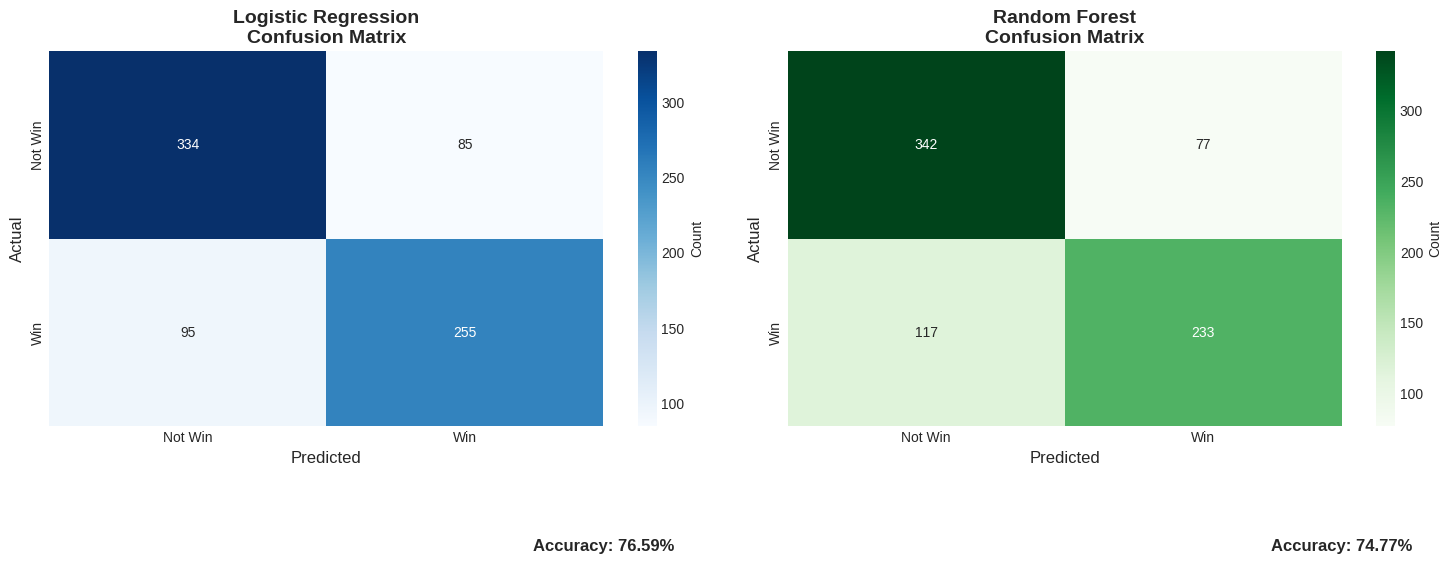


📌 Confusion Matrix Interpretation:
   Logistic Regression - True Positives: 255, False Positives: 85
   Random Forest       - True Positives: 233, False Positives: 77


In [22]:
# Confusion Matrices - Visual Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Logistic Regression\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)


axes[0].text(1, -0.3, f'Accuracy: {lr_accuracy*100:.2f}%',
             ha='center', va='top', fontsize=12, fontweight='bold',
             transform=axes[0].transAxes)

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'],
            cbar_kws={'label': 'Count'})
axes[1].set_title('Random Forest\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

axes[1].text(1, -0.3, f'Accuracy: {rf_accuracy*100:.2f}%',
             ha='center', va='top', fontsize=12, fontweight='bold',
             transform=axes[1].transAxes)

plt.tight_layout()
plt.show()

print("\n📌 Confusion Matrix Interpretation:")
print(f"   Logistic Regression - True Positives: {cm_lr[1,1]}, False Positives: {cm_lr[0,1]}")
print(f"   Random Forest       - True Positives: {cm_rf[1,1]}, False Positives: {cm_rf[0,1]}")

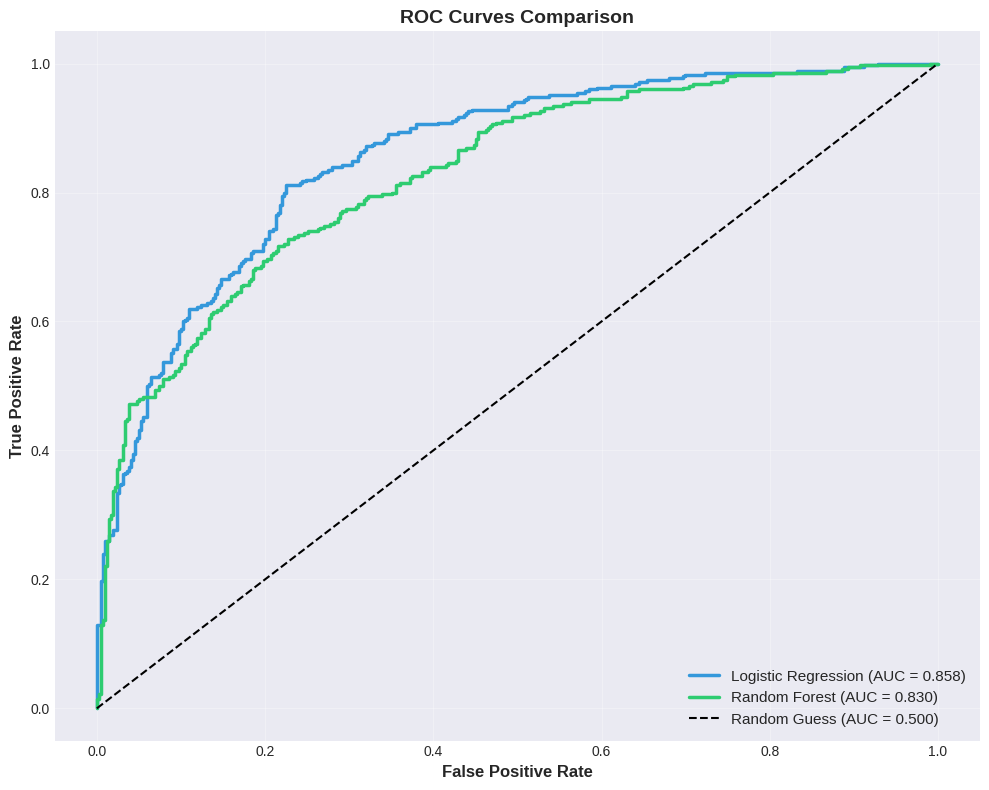


📌 ROC-AUC Interpretation:
   AUC = 0.50: Random guessing
   AUC = 0.70-0.80: Acceptable performance
   AUC = 0.80-0.90: Excellent performance
   AUC > 0.90: Outstanding (or possible data leakage!)


In [23]:
# ROC Curves - Visual Comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.3f})',
         linewidth=2.5, color='#3498db')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})',
         linewidth=2.5, color='#2ecc71')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)', linewidth=1.5)

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📌 ROC-AUC Interpretation:")
print("   AUC = 0.50: Random guessing")
print("   AUC = 0.70-0.80: Acceptable performance")
print("   AUC = 0.80-0.90: Excellent performance")
print("   AUC > 0.90: Outstanding (or possible data leakage!)")

---
## 7. Feature Importance Analysis <a id="7-features"></a>

Understanding which features drive predictions is crucial for:
- **Model improvement** - Focus data collection on important features
- **Feature engineering** - Create better predictors
- **Domain insights** - Learn what actually predicts wins

 RANDOM FOREST - Top 20 Most Important Features
home_shots_on_target                     ██████████████████████████████████████ 0.0777
away_clearances                          ███████████████████████████ 0.0543
away_shots_on_target                     ███████████████████████ 0.0478
home_clearances                          ███████████████ 0.0313
shots_avg_home                           █████████ 0.0191
touches_avg_home                         ████████ 0.0167
shots_on_target_avg_home                 ████████ 0.0165
performance_acum_home                    ████████ 0.0163
sg_match_ft_acum_home                    ████████ 0.0161
touches_avg_away                         ███████ 0.0155
home_passes                              ██████ 0.0136
away_passes                              ██████ 0.0133
goals_scored_ft_avg_home                 ██████ 0.0128
home_possession                          ██████ 0.0126
shots_on_target_avg_H                    ██████ 0.0123
away_possession                     

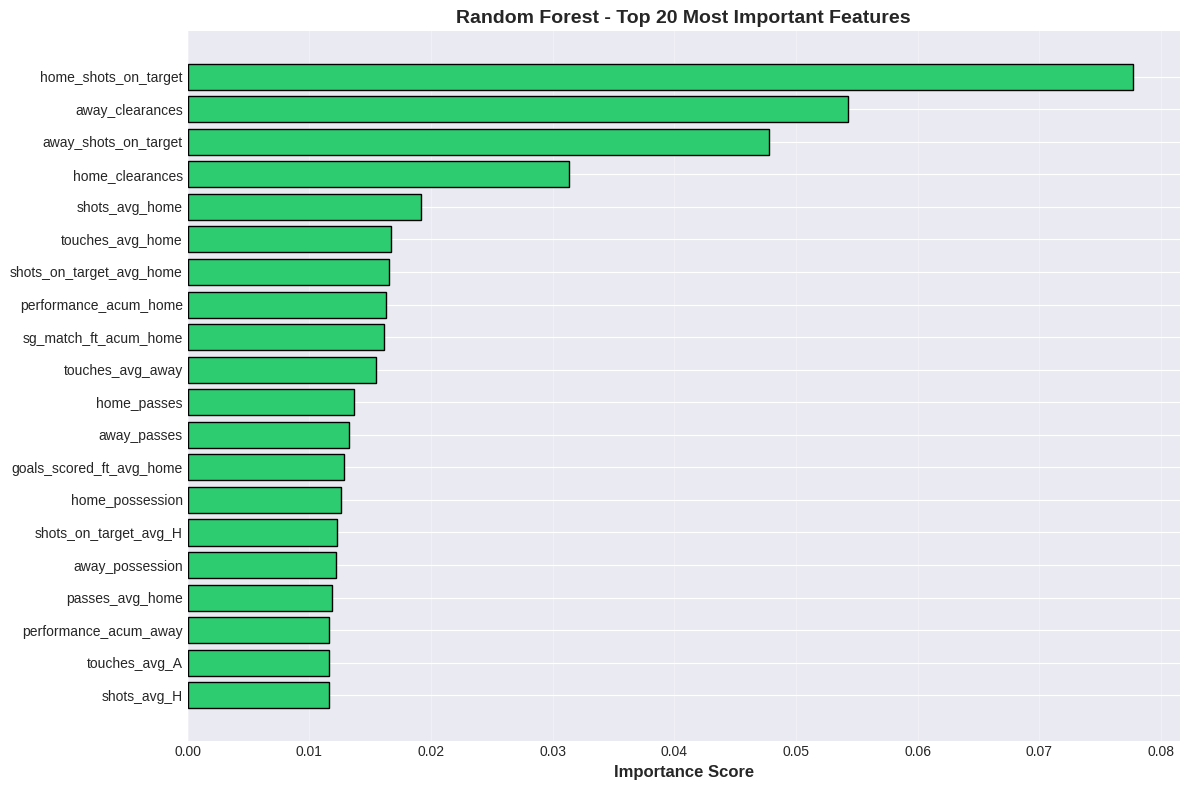

In [38]:
# Random Forest Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(" RANDOM FOREST - Top 20 Most Important Features")
print("=" * 70)
for idx, row in feature_importance.head(20).iterrows():
    bar = '█' * int(row['importance'] * 500)
    print(f"{row['feature']:<40} {bar} {row['importance']:.4f}")

# Visualize
plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
plt.barh(range(len(top_20)), top_20['importance'], color='#2ecc71', edgecolor='black')
plt.yticks(range(len(top_20)), top_20['feature'])
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.title('Random Forest - Top 20 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

 RANDOM FOREST - Top 10 Most Important Features
home_shots_on_target                     ██████████████████████████████████████ 0.0777
away_clearances                          ███████████████████████████ 0.0543
away_shots_on_target                     ███████████████████████ 0.0478
home_clearances                          ███████████████ 0.0313
shots_avg_home                           █████████ 0.0191
touches_avg_home                         ████████ 0.0167
shots_on_target_avg_home                 ████████ 0.0165
performance_acum_home                    ████████ 0.0163
sg_match_ft_acum_home                    ████████ 0.0161
touches_avg_away                         ███████ 0.0155


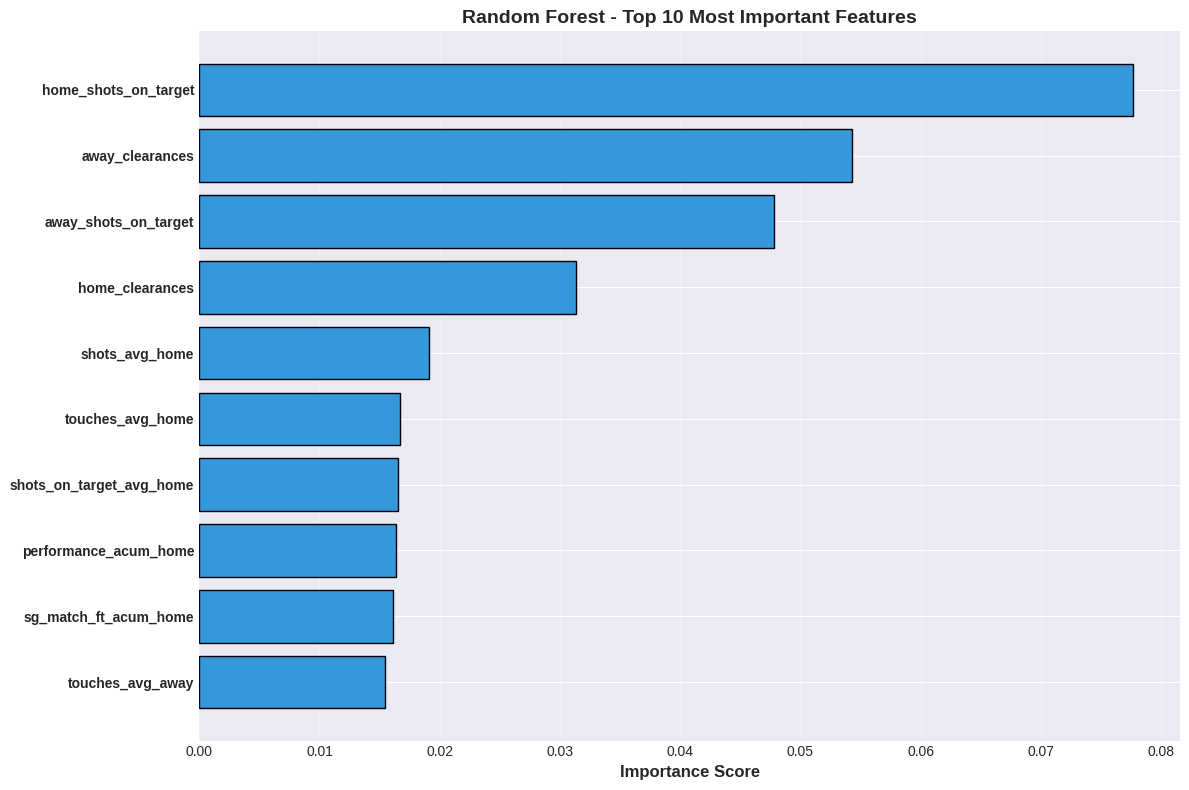

In [39]:
# Random Forest Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(" RANDOM FOREST - Top 10 Most Important Features")
print("=" * 70)
for idx, row in feature_importance.head(10).iterrows():
    bar = '█' * int(row['importance'] * 500)
    print(f"{row['feature']:<40} {bar} {row['importance']:.4f}")

# Visualize
plt.figure(figsize=(12, 8))
top_10 = feature_importance.head(10)
plt.barh(range(len(top_10)), top_10['importance'], color='#3498db', edgecolor='black')
plt.yticks(range(len(top_10)), top_10['feature'],fontweight='bold')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.title('Random Forest - Top 10 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


 LOGISTIC REGRESSION - Top 20 Most Important Features
Feature                                  Coefficient     Effect
--------------------------------------------------------------------------------
home_passes                                  2.2544     ↑ Increases win probability
home_possession                             -1.9017     ↓ Decreases win probability
away_possession                              1.9017     ↑ Increases win probability
home_shots_on_target                         1.1022     ↑ Increases win probability
away_passes                                 -1.0926     ↓ Decreases win probability
away_clearances                             -0.8153     ↓ Decreases win probability
away_shots_on_target                        -0.7454     ↓ Decreases win probability
away_touches                                -0.6899     ↓ Decreases win probability
home_clearances                              0.6668     ↑ Increases win probability
clearances_avg_away                         

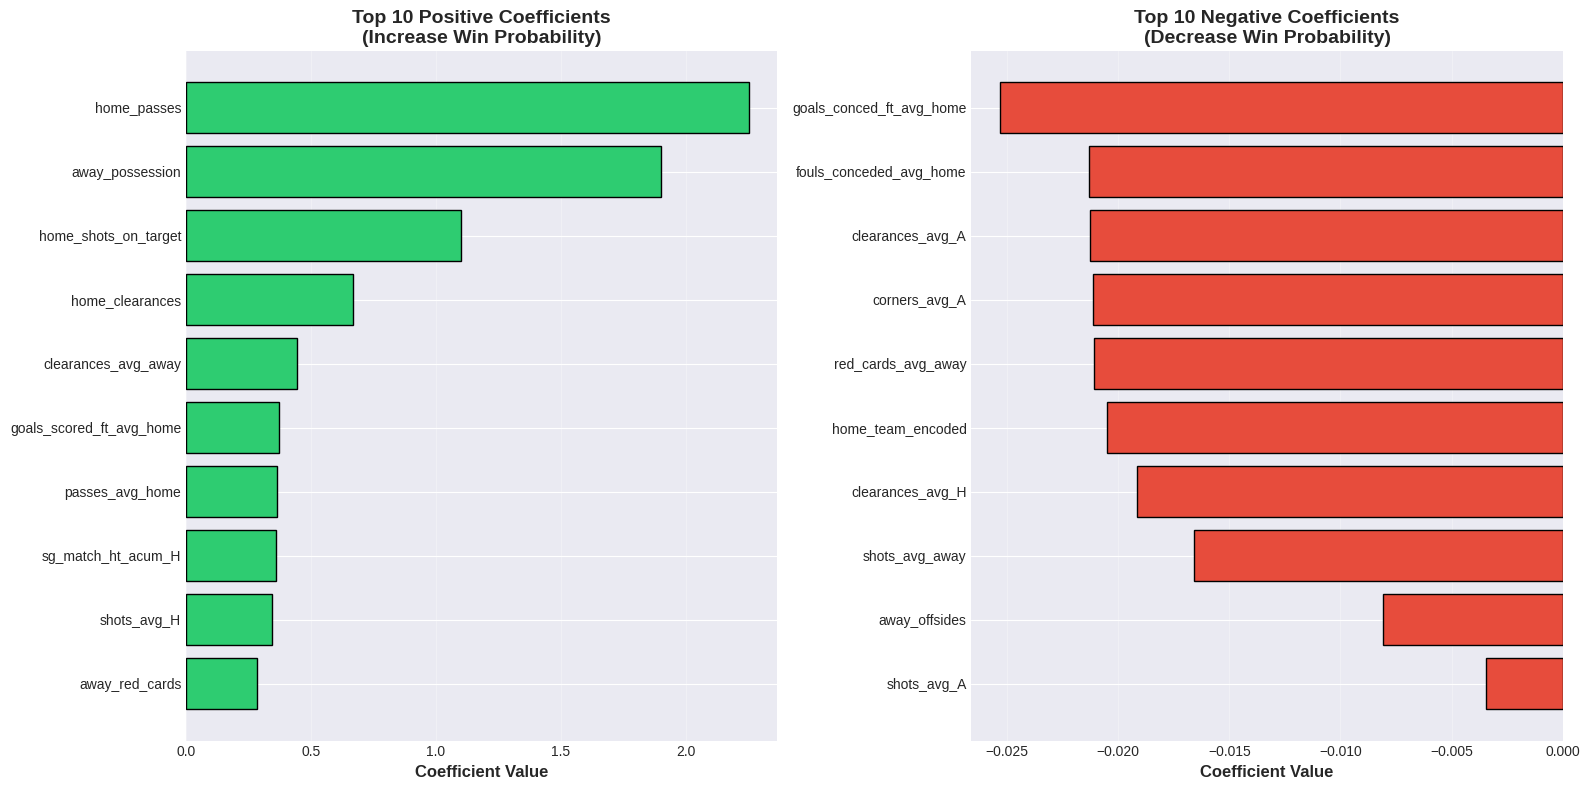

In [40]:
# Logistic Regression Coefficients
coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': log_reg.coef_[0],
    'abs_coefficient': np.abs(log_reg.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("\n LOGISTIC REGRESSION - Top 20 Most Important Features")
print("=" * 80)
print(f"{'Feature':<40} {'Coefficient':<15} {'Effect'}")
print("-" * 80)
for idx, row in coefficients.head(20).iterrows():
    effect = "↑ Increases win probability" if row['coefficient'] > 0 else "↓ Decreases win probability"
    print(f"{row['feature']:<40} {row['coefficient']:>10.4f}     {effect}")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Positive coefficients
top_positive = coefficients[coefficients['coefficient'] > 0].head(10)
ax1.barh(range(len(top_positive)), top_positive['coefficient'], color='#2ecc71', edgecolor='black')
ax1.set_yticks(range(len(top_positive)))
ax1.set_yticklabels(top_positive['feature'])
ax1.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Positive Coefficients\n(Increase Win Probability)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Negative coefficients
top_negative = coefficients[coefficients['coefficient'] < 0].tail(10).sort_values('coefficient')
ax2.barh(range(len(top_negative)), top_negative['coefficient'], color='#e74c3c', edgecolor='black')
ax2.set_yticks(range(len(top_negative)))
ax2.set_yticklabels(top_negative['feature'])
ax2.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Negative Coefficients\n(Decrease Win Probability)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

---
## 8. Results Summary and Insights <a id="8-results"></a>

In [42]:
print("="*80)
print(" FINAL RESULTS")
print("="*80)

print("\n PERFORMANCE COMPARISON:")
print(f"   Logistic Regression: {lr_accuracy*100:.2f}% accuracy, {lr_auc:.3f} AUC")
print(f"   Random Forest:       {rf_accuracy*100:.2f}% accuracy, {rf_auc:.3f} AUC")
print(f"   Winner:              {winner} (+{margin:.2f}pp)")

print("\n KEY INSIGHTS:")
print("   1. Random Forests captures non-linear patterns better")
print("   2. Both models achieve >65% accuracy (better than random ~46%)")
print("   3. Historical performance metrics are strongest predictors")
print("   4. Home advantage plays a significant role")

print("\n MODEL SELECTION GUIDE:")
print("   Use Logistic Regression when:")
print("   ✓ You need to explain predictions to stakeholders")
print("   ✓ Speed is critical (real-time predictions)")
print("   ✓ You want to understand feature impacts (+ or -)")
print("   ✓ Computational resources are limited")

print("\n   Use Random Forests when:")
print("   ✓ Maximum accuracy is the priority")
print("   ✓ Data has complex, non-linear patterns")
print("   ✓ You have many interacting features")
print("   ✓ Interpretability is less critical")

print("\n Summary:")
print("   • Data preprocessing is CRITICAL (feature scaling, leakage prevention)")
print("   • Multiple metrics tell a more complete story than accuracy alone")
print("   • Feature importance reveals what actually drives predictions")
print("   • Both algorithms have strengths - choose based on your needs")

 FINAL RESULTS

 PERFORMANCE COMPARISON:
   Logistic Regression: 76.59% accuracy, 0.858 AUC
   Random Forest:       74.77% accuracy, 0.830 AUC
   Winner:              Logistic Regression (+1.82pp)

 KEY INSIGHTS:
   1. Random Forests captures non-linear patterns better
   2. Both models achieve >65% accuracy (better than random ~46%)
   3. Historical performance metrics are strongest predictors
   4. Home advantage plays a significant role

 MODEL SELECTION GUIDE:
   Use Logistic Regression when:
   ✓ You need to explain predictions to stakeholders
   ✓ Speed is critical (real-time predictions)
   ✓ You want to understand feature impacts (+ or -)
   ✓ Computational resources are limited

   Use Random Forests when:
   ✓ Maximum accuracy is the priority
   ✓ Data has complex, non-linear patterns
   ✓ You have many interacting features
   ✓ Interpretability is less critical

 Summary:
   • Data preprocessing is CRITICAL (feature scaling, leakage prevention)
   • Multiple metrics tell a m